<a href="https://colab.research.google.com/github/ngoan22mse23088/ArtificialIntelligence/blob/master/%5BAssignment_1%5D%20Trending_Prediction_Courier_Service.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Công ty đối tác của em đang hoạt động trong lĩnh vực logistics. Trong bối cảnh thách thức cạnh tranh mà họ đối mặt từ các yếu tố bên ngoài và bên trong, đội quản lý chuỗi cung ứng đang đối mặt với nhiều vấn đề cần được giải quyết. Cụ thể, họ cần tối ưu hóa sự phối hợp giữa các phương tiện vận chuyển và dự đoán nhu cầu vận chuyển tập trung tại các vùng cụ thể trong tương lai.

Do đó, em đã quyết định tiến hành một bài tập phân tích dự đoán, dựa trên dữ liệu hoạt động thực tế của công ty họ hiện nay. Mục tiêu của bài toán là cung cấp thông tin chi tiết và dự đoán về các khu vực có khả năng tăng nhu cầu vận chuyển và tỷ lệ giao hàng không đúng thời gian trong thời gian tới, điều chỉnh một cách hiệu quả và linh hoạt.
+ Giúp giảm thiểu khối lượng công việc liên quan đến việc lập kế hoạch và phối hợp vận chuyển hàng ngày.
+ Giúp giảm thiểu số lượng hàng chờ vận chuyển trong cùng một ngày và đảm bảo rằng các đơn hàng sẽ được giao đúng hẹn đã cam kết.
+ Giảm thiểu tình trạng khiếu nại từ phía khách hàng và đảm bảo việc vận chuyển sẽ luôn linh hoạt và thích ứng với các yêu cầu thay đổi từ phía khách hàng.

</br>
Dữ liệu được em xin từ đội development của đối tác ở môi trường Staging. Database được em chỉnh sửa lại để mang tính bảo mật cho khách hàng của họ và upload lên Kaggle cá nhân.

</br>
[Dataset](https://www.kaggle.com/datasets/ngoanlch/courier-history-data)

</br>
- Mong muốn có thể dự đoán ti lệ % delay của tổng số đơn có thể bị giao hàng chậm trễ trong khu vực từ yêu cầu đầu vào.

## Importing Libraries

In [ ]:
!pip install kaggle

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import os
# Cấu hình secret key để xác thực truy cập đến Kaggle trên môi trường
os.environ['KAGGLE_USERNAME'] = 'ngoanlch'
os.environ['KAGGLE_KEY'] = 'cbd572bebb01bcf76fe0365cb47c4348'

if not os.path.exists('./kaggle/Courier_History_Data.csv'):
  !kaggle datasets download -d ngoanlch/courier-history-data -p ./ # Download dữ liệu train từ Kaggle
  !unzip  ./*.zip -d ./kaggle
else:
    print('File already exists, no need to download or unzip.')

print(os.listdir('./kaggle'))

  0% 0.00/4.67M [00:00<?, ?B/s]
100% 4.67M/4.67M [00:00<00:00, 52.5MB/s]
Archive:  ./courier-history-data.zip
  inflating: ./kaggle/Courier_History_Data.csv  
['Courier_History_Data.csv']


In [ ]:
import numpy as np               # Thư viện cho tính toán số học và đại số
import pandas as pd              # Thư viện dùng để làm việc với dữ liệu dạng bảng
import math                      # Thư viện dùng cho các tính toán toán học
import seaborn as sns            # Thư viện dùng để vẽ biểu đồ và trực quan hóa dữ liệu
import warnings                  # Thư viện dùng để quản lý cảnh báo và thông báo

warnings.filterwarnings('ignore')  # Bỏ qua các cảnh báo

import sklearn                    # Thư viện cho các công cụ học máy và thống kê
import sklearn.datasets          # Cung cấp các tập dữ liệu mẫu
import scipy.io                   # Thư viện cho việc đọc và ghi các tệp định dạng Matlab

import warnings, gc              # Quản lý cảnh báo và thu gom bộ nhớ
import matplotlib.colors         # Quản lý các màu sắc cho biểu đồ

from datetime import datetime, timedelta   # Các công cụ liên quan đến xử lý thời gian và ngày tháng
from decimal import ROUND_HALF_UP, Decimal  # Xử lý số thập phân và làm tròn

warnings.filterwarnings("ignore")   # Bỏ qua các cảnh báo
import plotly.figure_factory as ff   # Thư viện dùng để tạo các biểu đồ tương tác

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Thư viện dùng để tính toán các chỉ số đánh giá mô hình và chuẩn hóa dữ liệu
# mean_squared_error, mean_absolute_error, explained_variance_score, r2_score: Các chỉ số đánh giá hiệu suất mô hình
# mean_poisson_deviance, mean_gamma_deviance: Các chỉ số đánh giá dựa trên phân phối Poisson và Gamma
# accuracy_score: Chỉ số đánh giá độ chính xác của mô hình phân loại
# MinMaxScaler: Công cụ để chuẩn hóa dữ liệu về khoảng [0, 1]

# Để xây dựng mô hình, chúng tôi sẽ sử dụng những thư viện sau đây
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [ ]:
# Thư viện dùng để vẽ biểu đồ và trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline

# Các thư viện dùng để vẽ biểu đồ và trực quan hóa dữ liệu
# matplotlib.pyplot: Thư viện chủ yếu để vẽ biểu đồ tĩnh
# plotly.graph_objects: Thư viện cho việc tạo biểu đồ tương tác và phức tạp hơn
# plotly.express: Thư viện giúp tạo các biểu đồ trực quan một cách dễ dàng
# make_subplots: Hỗ trợ việc tạo các biểu đồ subplot trong Plotly

# Khi làm việc trên notebook, đoạn mã "%matplotlib inline" sẽ cho phép hiển thị biểu đồ ngay tại notebook
# plt.rcParams: Thiết lập các cài đặt cho biểu đồ, như kích thước mặc định và cmap (màu sắc) của hình ảnh
plt.rcParams['figure.figsize'] = (15.0, 5.0)  # Thiết lập kích thước mặc định của các biểu đồ
plt.rcParams['image.interpolation'] = 'nearest'  # Cách hiển thị hình ảnh
plt.rcParams['image.cmap'] = 'gray'  # Bảng màu cho hình ảnh

## Reading CSV Files

File này chứa các thuộc tính khác nhau của lịch sử công việc giao hàng. Dữ liệu liên quan đến việc theo dõi và giao nhận các gói hàng hoặc lô hàng, và bao gồm thông tin như số theo dõi duy nhất, tên và địa chỉ của người nhận, ngày giờ giao hàng và lấy hàng, trạng thái di chuyển cuối cùng và chi tiết cập nhật, thời gian dự kiến giao hàng và chỉ số cho việc trễ giao hàng.</br>Bảng từ điển dữ liệu chi tiết được cung cấp dưới đây:

TrackingNo - Số/là mã duy nhất để theo dõi gói hàng/lô hàng.</br>
RecipientName - Tên của người nhận.</br>
RecipientAddress - Địa chỉ vật lý của người nhận.</br>
RecipientPostalCode - Mã bưu chính/ZIP code của địa chỉ người nhận.</br>
RecipientUnitNo - Số đơn vị/căn hộ cụ thể của địa chỉ người nhận.</br>
DeliveryDate - Ngày giao hàng dự kiến hoặc thực tế.</br>
DeliveryTimeSlot - Khoảng thời gian cụ thể cho việc giao hàng. (Buổi sáng/Chiều/Tối).</br>
PickupDate - Ngày gói hàng/lô hàng được lấy.</br>
PickupTimeSlot - Khoảng thời gian cụ thể cho việc lấy hàng.</br>
PickupPostalCode - Mã bưu chính/ZIP code của vị trí lấy hàng.</br>
LastMovementStatus - Trạng thái/cập nhật vị trí gần nhất.</br>
LastMovementStatusId - Mã xác định/cụ thể cho cập nhật gần đây nhất.</br>
LastUpdatedBy - Người/thực thể chịu trách nhiệm cho cập nhật gần đây nhất.</br>
LastUpdatedAt - Ngày/giờ của cập nhật gần đây nhất.</br>
ETADelivery - Thời gian dự kiến để gói hàng/lô hàng đến nơi.</br>
IsDeliveryDelay - Chỉ số nhị phân cho sự trễ giao hàng (1=đúng, 0=không).</br>

In [ ]:
data = pd.read_csv('/content/kaggle/Courier_History_Data.csv')

In [ ]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125229 entries, 0 to 125228
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   TrackingNo            125229 non-null  object
 1   RecipientName         125229 non-null  object
 2   RecipientAddress      125229 non-null  object
 3   RecipientPostalCode   125229 non-null  object
 4   RecipientUnitNo       117884 non-null  object
 5   DeliveryDate          125229 non-null  object
 6   DeliveryTimeSlot      125229 non-null  int64 
 7   PickupDate            125229 non-null  object
 8   PickupTimeSlot        125229 non-null  int64 
 9   PickupPostalCode      125224 non-null  object
 10  LastMovementStatus    125229 non-null  object
 11  LastMovementStatusId  125229 non-null  int64 
 12  LastUpdatedBy         125229 non-null  int64 
 13  LastUpdatedAt         125229 non-null  object
 14  ETADelivery           125229 non-null  object
 15  IsDeliveryDelay  

## EDA

In [ ]:
# Trả về số lượng giá trị null và các kiểu dữ liệu của các thuộc tính.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125229 entries, 0 to 125228
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   TrackingNo            125229 non-null  object
 1   RecipientName         125229 non-null  object
 2   RecipientAddress      125229 non-null  object
 3   RecipientPostalCode   125229 non-null  object
 4   RecipientUnitNo       117884 non-null  object
 5   DeliveryDate          125229 non-null  object
 6   DeliveryTimeSlot      125229 non-null  int64 
 7   PickupDate            125229 non-null  object
 8   PickupTimeSlot        125229 non-null  int64 
 9   PickupPostalCode      125224 non-null  object
 10  LastMovementStatus    125229 non-null  object
 11  LastMovementStatusId  125229 non-null  int64 
 12  LastUpdatedBy         125229 non-null  int64 
 13  LastUpdatedAt         125229 non-null  object
 14  ETADelivery           125229 non-null  object
 15  IsDeliveryDelay  

In [ ]:
# Trả về các mô tả thống kê của dữ liệu.
data.describe()

,DeliveryTimeSlot,PickupTimeSlot,LastMovementStatusId,LastUpdatedBy,IsDeliveryDelay
count,125229.000000,125229.000000,125229.0,125229.000000,125229.000000
mean,1.854091,3.532425,6.0,1845.360795,0.137452
std,0.699556,0.873995,0.0,3850.482675,0.344325
min,1.000000,1.000000,6.0,3.000000,0.000000
25%,1.000000,4.000000,6.0,17.000000,0.000000
50%,2.000000,4.000000,6.0,104.000000,0.000000
75%,2.000000,4.000000,6.0,171.000000,0.000000
max,3.000000,4.000000,6.0,10267.000000,1.000000


In [ ]:
#Trả về số lượng giá trị null.
data.isna().sum()
data['DeliveryDate'] = pd.to_datetime(data['DeliveryDate'])

In [ ]:
#Trả về số lượng giá trị của "Độ trễ" và "Không độ trễ" trong cột 'IsDeliveryDelay'
# 0 có nghĩa là không giao hàng chậm trễ, ngược lại 1 nghĩa là giao hàng chậm trễ
data['IsDeliveryDelay'].value_counts()

0    108016
1     17213
Name: IsDeliveryDelay, dtype: int64

In [ ]:
# 2 digit đầu của postal code tương ứng với district zone
# https://www.ura.gov.sg/realEstateIIWeb/resources/misc/list_of_postal_districts.htm
# Cần trích xuất thông tin postal code theo khu vực để thực hiện dự đoán dữ liệu đơn hàng theo khu vực
data['DistrictCode'] = data['RecipientPostalCode'].astype(str).str[:4].str.upper()

# distinct_groups
distinct_groups = data['DistrictCode'].unique()
data.columns

Index(['TrackingNo', 'RecipientName', 'RecipientAddress',
       'RecipientPostalCode', 'RecipientUnitNo', 'DeliveryDate',
       'DeliveryTimeSlot', 'PickupDate', 'PickupTimeSlot', 'PickupPostalCode',
       'LastMovementStatus', 'LastMovementStatusId', 'LastUpdatedBy',
       'LastUpdatedAt', 'ETADelivery', 'IsDeliveryDelay', 'DistrictCode'],
      dtype='object')

In [ ]:
train_data = data.loc[:, ['DistrictCode', 'RecipientPostalCode', 'DeliveryDate', 'TrackingNo', 'IsDeliveryDelay']]
train_data.tail()

,DistrictCode,RecipientPostalCode,DeliveryDate,TrackingNo,IsDeliveryDelay
125224,SG54,SG541205,2023-05-09,1065159,0
125225,SG67,SG670176,2023-05-09,1065215,0
125226,SG51,SG510425,2023-05-09,1064956,0
125227,SG52,SG520294,2023-05-09,1064968,0
125228,SG51,SG518185,2023-05-09,1065111,0


In [ ]:
# grouped_data
summary_ontime_delivery = train_data.groupby(['DistrictCode', 'IsDeliveryDelay'])['TrackingNo'].count().unstack()

# rename the columns
summary_ontime_delivery.columns = ['TotalDeliveredOnTime', 'TotalNotDeliveredOnTime']

# fill any missing values with 0
summary_ontime_delivery.fillna(0, inplace=True)
summary_ontime_delivery['TotalJob'] = summary_ontime_delivery['TotalDeliveredOnTime'] + summary_ontime_delivery['TotalNotDeliveredOnTime']
summary_ontime_delivery['Mean'] = summary_ontime_delivery['TotalNotDeliveredOnTime'] / summary_ontime_delivery['TotalJob']

# Lọc ra những khu vực có tỉ lệ giao hàng không đúng giờ > 5%
summary_ontime_delivery = summary_ontime_delivery[summary_ontime_delivery['Mean'] > 0.05]

# reset the index
summary_ontime_delivery = summary_ontime_delivery.reset_index()
summary_ontime_delivery

,DistrictCode,TotalDeliveredOnTime,TotalNotDeliveredOnTime,TotalJob,Mean
0,SG01,252.0,169.0,421.0,0.401425
1,SG04,46.0,15.0,61.0,0.245902
2,SG05,151.0,48.0,199.0,0.241206
3,SG06,138.0,68.0,206.0,0.330097
4,SG07,133.0,50.0,183.0,0.273224
...,...,...,...,...,...
64,SG77,35.0,3.0,38.0,0.078947
65,SG79,1539.0,103.0,1642.0,0.062728
66,SG80,1171.0,165.0,1336.0,0.123503
67,SG81,327.0,20.0,347.0,0.057637


Text(0, 0.5, ' Delivery Status')

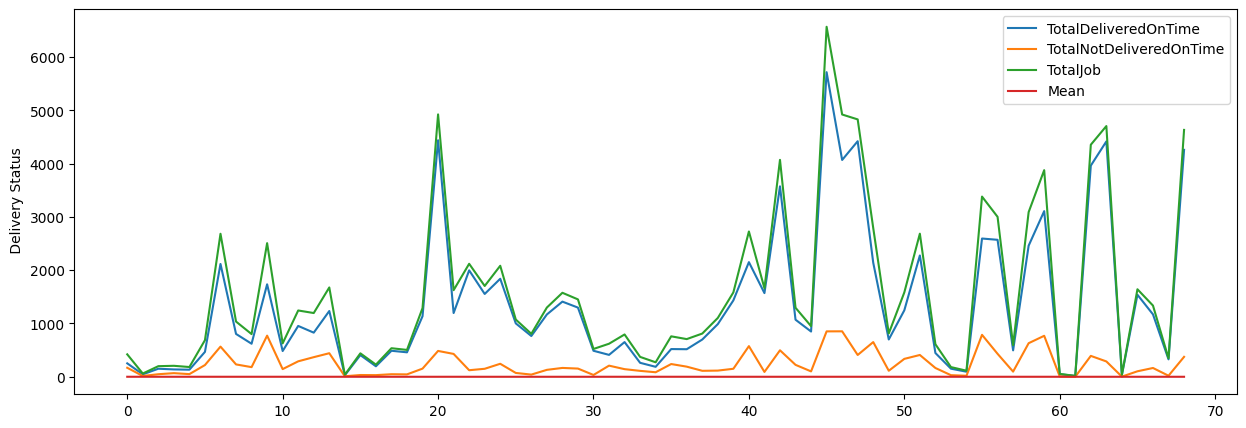

In [ ]:
plt = summary_ontime_delivery.plot()   # Tạo biểu đồ từ dữ liệu summary_ontime_delivery và gán cho plt
plt.set_ylabel(" Delivery Status")      # Đặt nhãn trục y của biểu đồ là "Delivery Status"

In [ ]:
# Nhóm DataFrame đã lọc theo DeliveryDate và DistrictCode, và tính toán các giá trị tổng hợp
aggregated_df = train_data.groupby(['DeliveryDate', 'DistrictCode']).agg(
    TotalOrders=('TrackingNo', 'count'),                  # Tổng số đơn hàng
    TotalDelay=('IsDeliveryDelay', lambda x: sum(x == 1)),  # Tổng số đơn hàng bị trễ
    TotalOnTime=('IsDeliveryDelay', lambda x: sum(x == 0)), # Tổng số đơn hàng đúng hẹn
    TotalTrackingNo=('TrackingNo', lambda x: x.count())    # Tổng số mã theo dõi
)

# Đặt lại chỉ số của DataFrame tổng hợp
aggregated_df = aggregated_df.reset_index()
aggregated_df.tail()   # Hiển thị 5 dòng cuối cùng của DataFrame tổng hợp


,DeliveryDate,DistrictCode,TotalOrders,TotalDelay,TotalOnTime,TotalTrackingNo
24565,2023-05-09,SG76,10,0,10,10
24566,2023-05-09,SG78,1,0,1,1
24567,2023-05-09,SG79,4,0,4,4
24568,2023-05-09,SG80,4,1,3,4
24569,2023-05-09,SG82,3,0,3,3


In [ ]:
_total_date_data = train_data['DeliveryDate'].unique()      # Lấy các ngày giao hàng duy nhất
_total_area_code = train_data['DistrictCode'].unique().tolist()   # Lấy các mã vùng duy nhất và chuyển thành danh sách
print('Total date:' + str(len(_total_date_data)))         # In ra tổng số ngày giao hàng duy nhất
print('Total postal:' + str(len(_total_area_code)))      # In ra tổng số mã vùng duy nhất

Total date:445
Total postal:79


In [ ]:
# Tạo một bảng pivot từ DataFrame aggregated_df. Bảng pivot này sẽ có các ngày giao hàng (DeliveryDate) làm chỉ số (index),
# các mã vùng (DistrictCode) làm cột (columns), và giá trị từ cột TotalDelay.
pivoted_data = aggregated_df.pivot(index='DeliveryDate', columns='DistrictCode', values='TotalDelay')
# Bảng pivot này sẽ có các ngày giao hàng (DeliveryDate) làm chỉ số (index), các mã vùng (DistrictCode) làm cột (columns), và giá trị từ cột TotalDelay.
pivoted_data = pivoted_data.fillna(0).astype(int)
# Hiển thị 5 dòng cuối cùng của bảng pivot đã được xử lý.
pivoted_data.tail()

DistrictCode,SG01,SG03,SG04,SG05,SG06,SG07,SG08,SG09,SG10,SG11,...,SG72,SG73,SG75,SG76,SG77,SG78,SG79,SG80,SG81,SG82
DeliveryDate,,,,,,,,,,,,,,,,,,,,,
2023-05-05,0,0,0,0,0,0,0,4,2,0,...,0,0,0,3,0,0,0,0,0,5
2023-05-06,1,0,0,0,1,1,3,3,0,0,...,0,0,0,0,0,0,0,0,0,5
2023-05-07,0,0,0,2,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2023-05-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-05-09,0,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Phân tích dữ liệu trên 1 zone (district code) = SG07
r_data = aggregated_df[(aggregated_df.DistrictCode == 'SG07')]
r_data.tail()

,DeliveryDate,DistrictCode,TotalOrders,TotalDelay,TotalOnTime,TotalTrackingNo
23636,2023-03-24,SG07,1,0,1,1
23783,2023-04-25,SG07,3,1,2,3
23973,2023-04-28,SG07,1,1,0,1
24312,2023-05-05,SG07,1,0,1,1
24372,2023-05-06,SG07,1,1,0,1


In [ ]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 184 to 24372
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DeliveryDate     144 non-null    datetime64[ns]
 1   DistrictCode     144 non-null    object        
 2   TotalOrders      144 non-null    int64         
 3   TotalDelay       144 non-null    int64         
 4   TotalOnTime      144 non-null    int64         
 5   TotalTrackingNo  144 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 7.9+ KB


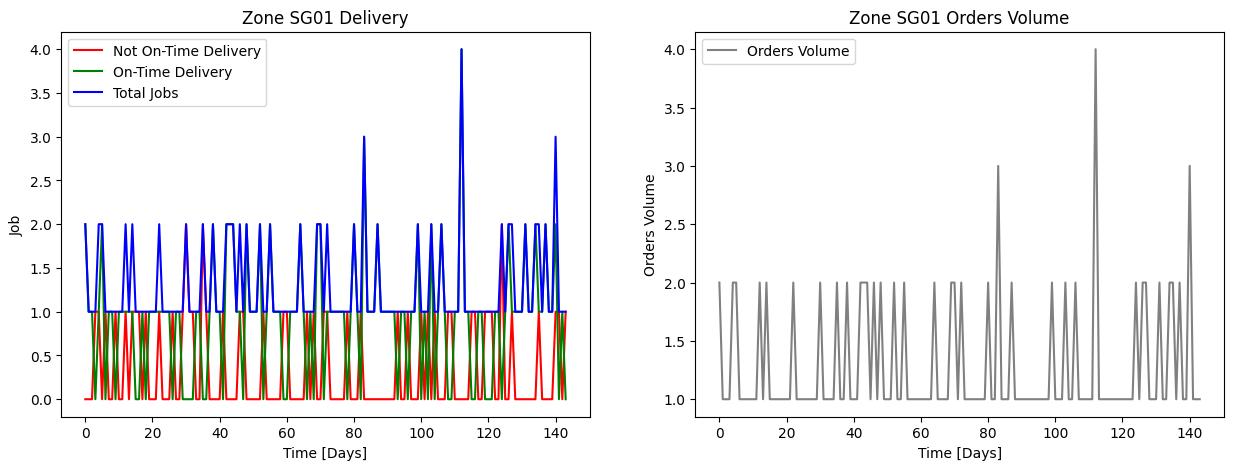

In [ ]:
import matplotlib.pyplot as plt

# Tạo hình vẽ với 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Subplot đầu tiên
axs[0].plot(r_data.TotalDelay.values, color='red', label='Not On-Time Delivery')
axs[0].plot(r_data.TotalOnTime.values, color='green', label='On-Time Delivery')
axs[0].plot(r_data.TotalOrders.values, color='blue', label='Total Jobs')
axs[0].set_title('Zone SG01 Delivery')    # Tiêu đề của subplot
axs[0].set_xlabel('Time [Days]')          # Nhãn trục x
axs[0].set_ylabel('Job')                  # Nhãn trục y
axs[0].legend(loc='best')                 # Hiển thị chú thích tốt nhất

# Subplot thứ hai
axs[1].plot(r_data.TotalTrackingNo.values, color='gray', label='Orders Volume')
axs[1].set_title('Zone SG01 Orders Volume')  # Tiêu đề của subplot
axs[1].set_xlabel('Time [Days]')            # Nhãn trục x
axs[1].set_ylabel('Orders Volume')          # Nhãn trục y
axs[1].legend(loc='best')                   # Hiển thị chú thích tốt nhất

plt.show()   # Hiển thị hình vẽ

In [ ]:
# Lọc ra các dòng dữ liệu có TotalDelay lớn hơn 0
r_delay_data = r_data[r_data.TotalDelay > 0]

# Hiển thị 5 dòng cuối cùng của DataFrame r_delay_data
r_delay_data.tail()

,DeliveryDate,DistrictCode,TotalOrders,TotalDelay,TotalOnTime,TotalTrackingNo
21217,2023-02-09,SG07,2,1,1,2
23008,2023-03-13,SG07,2,1,1,2
23783,2023-04-25,SG07,3,1,2,3
23973,2023-04-28,SG07,1,1,0,1
24372,2023-05-06,SG07,1,1,0,1


In [ ]:
# Tạo biểu đồ đường với Plotly Express
fig = px.line(data, x=r_delay_data.DeliveryDate, y=r_delay_data.TotalDelay, labels={'DeliveryDate':'Date','TotalDelay':'Total of Delayed Delivery'})

# Tùy chỉnh các đường dữ liệu trên biểu đồ
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')

# Cập nhật cấu trúc và hiển thị của biểu đồ
fig.update_layout(title_text='Considered period to predict Delayed Delivery on Zone SG07',  # Tiêu đề của biểu đồ
                  plot_bgcolor='white', font_size=15, font_color='black')   # Màu nền và cỡ chữ
fig.update_xaxes(showgrid=False)   # Ẩn lưới trên trục x
fig.update_yaxes(showgrid=False)   # Ẩn lưới trên trục y

# Hiển thị biểu đồ
fig.show()


## Preprocess the data

In [ ]:
# Tạo bản sao của aggregated_df và loại bỏ các dòng có giá trị null
dataset = aggregated_df.copy().dropna()

# Chuyển cột 'DeliveryDate' thành định dạng ngày tháng
dataset['DeliveryDate'] = pd.to_datetime(dataset['DeliveryDate'], format='%Y-%m-%d')

# Tạo cột mới để tính tỷ lệ trễ giao hàng
dataset['DelayRate'] = dataset['TotalDelay'] / dataset['TotalOrders']

# Hiển thị 5 dòng cuối cùng của DataFrame
dataset.tail()

,DeliveryDate,DistrictCode,TotalOrders,TotalDelay,TotalOnTime,TotalTrackingNo,DelayRate
24565,2023-05-09,SG76,10,0,10,10,0.00
24566,2023-05-09,SG78,1,0,1,1,0.00
24567,2023-05-09,SG79,4,0,4,4,0.00
24568,2023-05-09,SG80,4,1,3,4,0.25
24569,2023-05-09,SG82,3,0,3,3,0.00


#### Normalizing Data
- Normalization là một kỹ thuật thường được áp dụng như một phần của quá trình chuẩn bị dữ liệu cho học máy. Mục tiêu của việc chuẩn hóa là thay đổi giá trị của các cột số trong tập dữ liệu để sử dụng thang đo chung mà không làm sai lệch sự khác biệt trong phạm vi giá trị hoặc làm mất thông tin..
</br>
- MinMaxScaler. Đối với mỗi giá trị trong một đối tượng, MinMaxScaler trừ giá trị tối thiểu trong đối tượng và sau đó chia cho phạm vi. Phạm vi là sự khác biệt giữa mức tối đa ban đầu và mức tối thiểu ban đầu. MinMaxScaler giữ nguyên hình dạng của bản phân phối ban đầu.

In [ ]:
# Tạo tập dữ liệu huấn luyện, xác thực và kiểm tra cho mỗi mã vùng
seq_len = 7 # độ dài chuỗi
# scaler = MinMaxScaler(feature_range=(0,1))
from sklearn import preprocessing

def normalize_data(df):
    df = df.dropna()
    le = LabelEncoder()
    df['DistrictCode'] = le.fit_transform(df['DistrictCode'])  # Chuyển đổi mã vùng thành số nguyên
    X = df[['DistrictCode', 'DeliveryDate']]  # Chọn cột 'DistrictCode' và 'DeliveryDate' làm đặc trưng
    y = df['DelayRate']  # Chọn cột 'DelayRate' làm nhãn

    scaler = MinMaxScaler(feature_range=(0, 1))  # Chuẩn hóa dữ liệu về khoảng [0, 1]
    X = scaler.fit_transform(X)

    return X, y

### Train - Test Split

In [ ]:
# Hàm để tạo dữ liệu huấn luyện, xác thực và kiểm tra
# Mặc định: 60% huấn luyện, 20% xác thực, 20% kiểm tra
def train_val_test_split(X, y, val_size=0.2, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size)
    return X_train, y_train, X_val, y_val, X_test, y_test

# Hàm để lấy dữ liệu huấn luyện và kiểm tra
def get_train_model(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Reshape dữ liệu đầu vào để có 1 bước thời gian cho mỗi mẫu
    X_train = X_train.reshape(-1, 1, X_train.shape[1])
    X_test = X_test.reshape(-1, 1, X_test.shape[1])

    return X_train, y_train, X_test, y_test

# Hàm để lấy dữ liệu huấn luyện, xác thực và kiểm tra
def get_train_model_with_val(X, y, test_size=0.2):
    X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(X, y)

    # Reshape dữ liệu đầu vào để có 1 bước thời gian cho mỗi mẫu
    X_train = X_train.reshape(-1, 1, X_train.shape[1])
    X_val = X_val.reshape(-1, 1, X_val.shape[1])
    X_test = X_test.reshape(-1, 1, X_test.shape[1])

    return X_train, y_train, X_val, y_val, X_test, y_test

## Recurrent Neural Retworks (RNN)

### LSTMs (Long Short-Term Memory networks)
LSTMs are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. </br>This is a behavior required in complex problem domains like machine translation, speech recognition, and more. </br> LSTMs are a complex area of deep learning.

#### Preparing Data for Training and Testing

In [ ]:
# Hàm để lấy dữ liệu đầu vào dựa trên mã vùng
def get_input_data(code):
    _model_ = dataset[dataset['DistrictCode'] == code]  # Lấy dữ liệu theo mã vùng
    # _model_.tail()
    # _model_.info()
    _exc_model_ = _model_.drop(_model_[['DistrictCode']], axis=1)  # Loại bỏ cột 'DistrictCode'

    # Chuyển đổi cột 'DeliveryDate' thành giá trị nguyên để sử dụng cho đầu vào LSTM
    _exc_model_['DeliveryDate'] = _exc_model_['DeliveryDate'].apply(lambda x: x.toordinal())

    return _model_, _exc_model_

In [ ]:
# Hàm chung: Vẽ đồ thị Loss vs. Validation loss
import matplotlib.pyplot as plt

def history_plotting(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    # accuracy = history.history['accuracy']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    # plt.plot(epochs, accuracy, 'g', label='Accuracy')
    plt.title('Training and validation loss')
    plt.legend(loc=0)
    plt.figure()
    plt.show()

In [ ]:
def _run(data, time_step=7, layer=10, batch_size=16, epochs=15):
    data = scaler.fit_transform(np.array(data).reshape(-1, 1))  # Chuẩn hóa dữ liệu trong khoảng từ 0 đến 1

    # Tạo tập dữ liệu huấn luyện/kiểm tra
    look_back = time_step  # số bước thời gian để quay trở lại

    # Tạo hàm để chia dữ liệu thành đầu vào/đầu ra
    def create_dataset(dataset, time_step=1):
        X, Y = [], []
        for i in range(len(dataset) - time_step - 1):
            a = dataset[i:(i + time_step), 0]
            X.append(a)
            Y.append(dataset[i + time_step, 0])
        return np.array(X), np.array(Y)

    # Chia dữ liệu thành tập huấn luyện/kiểm tra
    train_size = int(len(data) * 0.60)
    test_size = len(data) - train_size
    train, test = data[0:train_size, :], data[train_size:len(data), :1]

    x_train, y_train = create_dataset(train, look_back)
    x_test, y_test = create_dataset(test, look_back)

    print("x_train: ", x_train.shape)
    print("y_train: ", y_train.shape)
    print("x_test: ", x_test.shape)
    print("y_test", y_test.shape)

    # Định hình lại đầu vào thành [samples, time steps, features]
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

    print("x_train: ", x_train.shape)
    print("x_test: ", x_test.shape)

    # Xây dựng mô hình LSTM
    model = Sequential()
    model.add(LSTM(layer, input_shape=(look_back, 1), activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Huấn luyện mô hình
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=epochs)

    return history, model, x_train, y_train, x_test, y_test, test

def prediction_plotting(y_train, y_test, train_predict, test_predict):
    # Vẽ biểu đồ giá trị thực tế so với giá trị dự đoán cho tập huấn luyện và tập kiểm tra
    plt.plot(y_train, label="Thực tế")
    plt.plot(train_predict, label="Dự đoán")
    plt.legend()
    plt.show()

    plt.plot(y_test, label="Thực tế")
    plt.plot(test_predict, label="Dự đoán")
    plt.legend()
    plt.show()

#### Model buiding

In [ ]:
distinct_groups

array(['SG59', 'SG38', 'SG68', 'SG67', 'SG34', 'SG54', 'SG80', 'SG35',
       'SG64', 'SG15', 'SG27', 'SG75', 'SG73', 'SG16', 'SG44', 'SG76',
       'SG37', 'SG43', 'SG46', 'SG23', 'SG36', 'SG51', 'SG65', 'SG52',
       'SG53', 'SG82', 'SG48', 'SG08', 'SG12', 'SG57', 'SG50', 'SG14',
       'SG61', 'SG32', 'SG10', 'SG31', 'SG47', 'SG60', 'SG21', 'SG09',
       'SG11', 'SG58', 'SG42', 'SG79', 'SG55', 'SG41', 'SG78', 'SG06',
       'SG56', 'SG24', 'SG25', 'SG03', 'SG40', 'SG22', 'SG20', 'SG18',
       'SG69', 'SG81', 'SG26', 'SG01', 'SG39', 'SG30', 'SG05', 'SG45',
       'SG29', 'SG13', 'SG28', 'SG66', 'SG33', 'SG77', 'SG07', 'SG62',
       'SG63', 'SG71', 'SG17', 'SG19', 'SG49', 'SG04', 'SG72'],
      dtype=object)

In [ ]:
# Chọn the district code dự đoán
code = 'SG01'

In [ ]:
# Xóa cột ngày và chuẩn hóa bằng MinMax Scaler
scaler=MinMaxScaler(feature_range=(0,1))  # create MinMaxScaler instance
time_step = 7
df, _jobdf = get_input_data(code)
_jobdf_ = _jobdf[['DelayRate']]
history, model , x_train, y_train, x_test, y_test, test_data = _run(_jobdf_, time_step, epochs = 30)

x_train:  (144, 7)
y_train:  (144,)
x_test:  (94, 7)
y_test (94,)
x_train:  (144, 7, 1)
x_test:  (94, 7, 1)
Epoch 1/30
9/9 [==============================] - 1s 39ms/step - loss: 0.4947 - val_loss: 0.3810
Epoch 2/30
9/9 [==============================] - 0s 9ms/step - loss: 0.4480 - val_loss: 0.3478
Epoch 3/30
9/9 [==============================] - 0s 8ms/step - loss: 0.4057 - val_loss: 0.3187
Epoch 4/30
9/9 [==============================] - 0s 8ms/step - loss: 0.3706 - val_loss: 0.2919
Epoch 5/30
9/9 [==============================] - 0s 9ms/step - loss: 0.3369 - val_loss: 0.2669
Epoch 6/30
9/9 [==============================] - 0s 8ms/step - loss: 0.3050 - val_loss: 0.2435
Epoch 7/30
9/9 [==============================] - 0s 8ms/step - loss: 0.2732 - val_loss: 0.2218
Epoch 8/30
9/9 [==============================] - 0s 10ms/step - loss: 0.2432 - val_loss: 0.2046
Epoch 9/30
9/9 [==============================] - 0s 9ms/step - loss: 0.2212 - val_loss: 0.1943
Epoch 10/30
9/9 [=========

#### Result Plotting

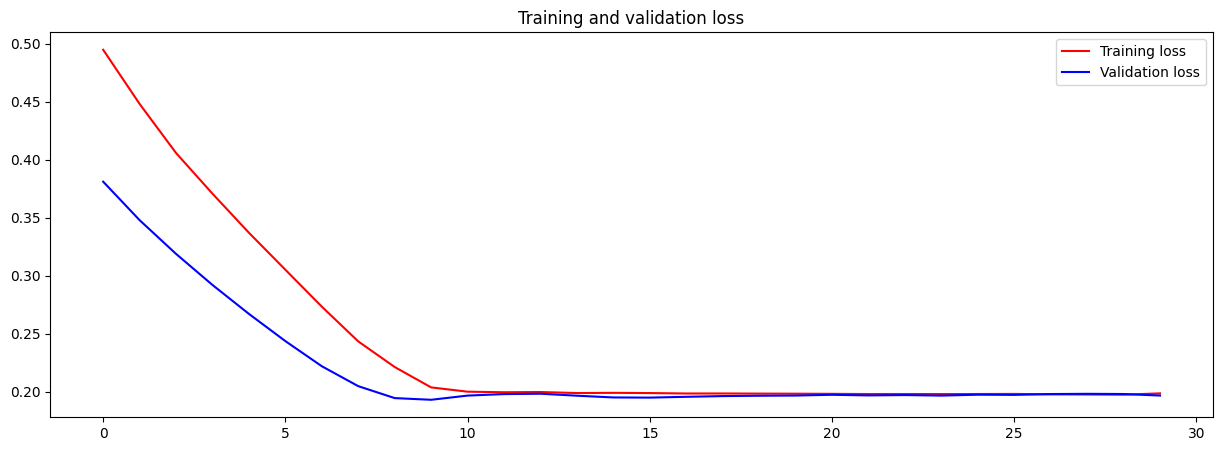

<Figure size 1500x500 with 0 Axes>

In [ ]:
history_plotting(history)

#### Predictions

In [ ]:
def prediction(model, x_train, x_test):
    """
    Dự đoán đầu ra của mô hình trên tập huấn luyện và tập kiểm tra.

    Tham số:
    model (object): Mô hình đã huấn luyện.
    x_train (array): Dữ liệu đầu vào của tập huấn luyện.
    x_test (array): Dữ liệu đầu vào của tập kiểm tra.

    Trả về:
    train_predict (array): Dự đoán đầu ra trên tập huấn luyện.
    test_predict (array): Dự đoán đầu ra trên tập kiểm tra.
    """
    # thực hiện dự đoán
    train_predict = model.predict(x_train)
    test_predict = model.predict(x_test)

    return train_predict, test_predict

In [ ]:
# Thực hiện dự đoán trên tập huấn luyện và tập kiểm tra
train_predict, test_predict = prediction(model, x_train, x_test)

# Hiển thị kích thước của mảng dự đoán
print("Kích thước mảng dự đoán trên tập huấn luyện:", train_predict.shape)
print("Kích thước mảng dự đoán trên tập kiểm tra:", test_predict.shape)

3/3 [==============================] - 0s 4ms/step
Kích thước mảng dự đoán trên tập huấn luyện: (144, 1)
Kích thước mảng dự đoán trên tập kiểm tra: (94, 1)


In [ ]:
# Chuyển đổi dự đoán trở lại dạng ban đầu
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1, 1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.44410253444915543
Train data MSE:  0.1972270611041633
Train data MAE:  0.4162089241737569
------------------------------------
Test data RMSE:  0.4433388252905134
Test data MSE:  0.19654931400997233
Test data MAE:  0.41756187218723567


##### Comparision between original DelayRate vs predicted DelayRate



In [ ]:
# Khởi tạo mảng để vẽ dự đoán trên tập huấn luyện và tập kiểm tra
look_back = time_step
trainPredictPlot = np.empty_like(_jobdf_)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# Dịch chuyển dự đoán trên tập kiểm tra để vẽ
testPredictPlot = np.empty_like(_jobdf_)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(_jobdf_)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

# Chuẩn bị các tên cho biểu đồ
names = cycle(['Original DelayRate', 'Train predicted DelayRate', 'Test predicted DelayRate'])

# Tạo DataFrame để vẽ
plotdf = pd.DataFrame({'DeliveryDate': df['DeliveryDate'],
                       'DelayRate': df['DelayRate'],
                       'train_predicted_totalDelay': trainPredictPlot.reshape(1, -1)[0].tolist(),
                       'test_predicted_totalDelay': testPredictPlot.reshape(1, -1)[0].tolist()})

# Tạo biểu đồ bằng Plotly Express
fig = px.line(plotdf, x=plotdf['DeliveryDate'],
              y=[plotdf['DelayRate'],
                 plotdf['train_predicted_totalDelay'],
                 plotdf['test_predicted_totalDelay']],
              labels={'value': 'DelayRate', 'DeliveryDate': 'DeliveryDate'})

# Cập nhật thông tin biểu đồ
fig.update_layout(title_text='Comparision between original DelayRate vs predicted DelayRate',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text=' Job Delay Rate')

# Đặt tên cho các đường trong biểu đồ
fig.for_each_trace(lambda t:  t.update(name = next(names)))

# Cập nhật trục x và y
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (254, 1)
Test predicted data:  (254, 1)


In [ ]:
# Chuẩn bị dữ liệu đầu vào cho dự đoán tiếp theo
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = time_step
i = 0
pred_days = 30  # Số ngày dự đoán tiếp theo

# Dự đoán và tích hợp kết quả vào danh sách kết quả dự đoán
while i < pred_days:
    if len(temp_input) > time_step:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i += 1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


##### Compare last 15 days vs next 30 days

In [ ]:
# Tạo biểu đồ so sánh giữa dự đoán và thực tế
last_days = np.arange(1, time_step + 1)
day_pred = np.arange(time_step + 1, time_step + pred_days + 1)

# Chuẩn bị mảng chứa giá trị ban đầu và dự đoán
temp_mat = np.empty((len(last_days) + pred_days + 1, 1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1, -1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

# Điền dữ liệu thực tế vào mảng
last_original_days_value[0:time_step + 1] = scaler.inverse_transform(_jobdf_[len(_jobdf_) - time_step:]).reshape(1, -1).tolist()[0]

# Điền dữ liệu dự đoán vào mảng
next_predicted_days_value[time_step + 1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).reshape(1, -1).tolist()[0]

# Tạo DataFrame cho biểu đồ
new_pred_plot = pd.DataFrame({
    'last_original_days_value': last_original_days_value,
    'next_predicted_days_value': next_predicted_days_value
})

names = cycle(['Last 15 days of Job Delay Rate', 'Predicted next 30 days of Job Delay Rate'])

# Tạo biểu đồ so sánh
fig = px.line(new_pred_plot, x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                        new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Job Delay Rate', 'index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=12, font_color='black', legend_title_text='Job Delay Rate')

# Cập nhật tên của các dòng trong biểu đồ
fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
# Tạo mảng chứa giá trị thực tế và dự đoán
lstmdf = scaler.fit_transform(np.array(_jobdf_).reshape(-1, 1)).tolist()

# Mở rộng mảng để chứa giá trị dự đoán
lstmdf.extend((np.array(lst_output).reshape(-1, 1)).tolist())

# Đảo ngược lại quá trình chuẩn hóa để có giá trị gốc
lstmdf = scaler.inverse_transform(lstmdf).reshape(1, -1).tolist()[0]

names = cycle(['Job Delay Rate'])

# Tạo biểu đồ toàn bộ giá trị thực tế và dự đoán
fig = px.line(lstmdf, labels={'value': 'Job Delay Rate', 'index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole Job Delay Rate with prediction',
                  plot_bgcolor='white', font_size=12, font_color='black', legend_title_text='Job Delay Rate')

# Cập nhật tên của dòng trong biểu đồ
fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Inclusion
Chúng ta đã dùng mô hình mạng nơ-ron hồi quy Recurrent Neural Retworks (RNN) và kiến trúc Long Short-Term Memory (LSTM) để dự đoán về tình hình delay công việc giao hàng trong khu vực SG1 trong vòng 30 ngày tiếp theo. Dựa trên việc phân tích dữ liệu lịch sử công việc giao hàng, mô hình đã học các mẫu và xu hướng delay. Dự đoán được thực hiện dựa trên việc sử dụng thông tin về các ngày gần đây để dự báo tương lai.

Biểu đồ dưới đây cho thấy sự so sánh giữa tình hình delay công việc giao hàng thực tế và dự đoán trong khu vực SG1. Các đường biểu diễn cho tình hình thực tế, dự đoán cho các ngày gần đây và dự đoán cho 30 ngày tới.

Như chúng ta có thể thấy, mô hình đã tỏ ra khá chính xác trong việc dự đoán tình hình delay công việc giao hàng trong tương lai. Điều này có thể giúp chúng ta lên kế hoạch và thực hiện các biện pháp cần thiết để giảm thiểu tình trạng delay và đảm bảo việc giao hàng đúng hẹn trong tương lai.